In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [169]:
#등락으로 분류를 시켰기 때문에 등락 퍼센트는 제거해 주었습니다. 대비는 제거할지 말지 상의를 해 봐야 할 것 같습니다.
df=pd.read_csv(r'C:\DRworks\hinix_moreshort.csv',encoding='cp949', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5275 entries, 2000-01-04 to 2021-05-14
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   등락분류           5275 non-null   int64  
 1   종가             5275 non-null   int64  
 2   대비             5275 non-null   int64  
 3   시가             5275 non-null   int64  
 4   고가             5275 non-null   int64  
 5   저가             5275 non-null   int64  
 6   거래량            5275 non-null   int64  
 7   거래대금           5275 non-null   float64
 8   시가총액           5275 non-null   float64
 9   상장주식수          5275 non-null   int64  
 10  환율             5275 non-null   float64
 11  유가종가           5275 non-null   float64
 12  유가오픈           5275 non-null   float64
 13  유가고가           5275 non-null   float64
 14  유가저가           5275 non-null   float64
 15  유가변동률          5275 non-null   float64
 16  한국은행기준금리       5275 non-null   float64
 17  연준기준금리         5275 non-null   float64
 18

In [170]:
#xbbost를 위해 x y 로 데이터 분리 후 dmatrix로 변환 (y=등락정도)
X, y = df.iloc[:,1:],df.iloc[:,0]
data_dmatrix = xgb.DMatrix(data=X,label=y)


In [171]:
#학습/테스트 데이터 나누기+ xgboost 분류모델 정의
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#코로나 시기로 분할할 때 데이터
#split = "2020-03-19"
#train = df[:split]
#test= df[split:]

#y_train = df.loc[:,'등락분류']
#X_train = df.drop('등락분류', axis=1)
#y_test = df.loc[:,'등락분류']
#X_test = df.drop('등락분류', axis=1)

model=XGBClassifier(booster='gbtree', 
                    colsample_bylevel=0.9, 
                    colsample_bytree=0.8, 
                    gamma=0, 
                    max_depth=8, 
                    min_child_weight=3, 
                    n_estimators=50, 
                    nthread=4, 
                    objective='multi:softprob', 
                    random_state=2, 
                    silent= True)

model.fit(X_train, y_train,verbose=False)

[03:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=2, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

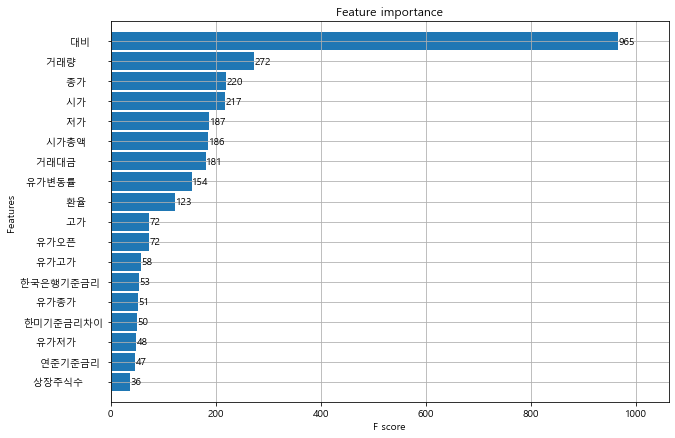

In [172]:
#변수 중요도 그래프
plt.rc('font',family='Malgun Gothic')
plt.rcParams["figure.figsize"] = (10,7)
plot_importance(model, height=0.9)

In [173]:
#모델 예측
y_pred = model.predict(X_test)
y_true = y_test

acc = accuracy_score(y_true, y_pred)
con_mat = confusion_matrix(y_true, y_pred)
con_mat
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

          -2       0.86      0.85      0.85        65
          -1       0.98      0.98      0.98       460
           0       1.00      1.00      1.00        41
           1       0.98      1.00      0.99       432
           2       0.98      0.88      0.93        57

    accuracy                           0.97      1055
   macro avg       0.96      0.94      0.95      1055
weighted avg       0.97      0.97      0.97      1055

